In [50]:
import numpy as np
import networkx as nx
from pprint import pprint
import pandas as pd
from pylab import rcParams
from random import randint
from collections import deque
rcParams['figure.figsize'] = 10, 10
np.set_printoptions(threshold=10000)

In [2]:
N = 100 # Vertices
M = 200 # Edges

In [29]:
graph = nx.generators.random_graphs.gnm_random_graph(N, M)
adjacency_matrix = nx.adjacency_matrix(graph).todense()

In [71]:
adjacency_matrix[0:3]

matrix([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0,

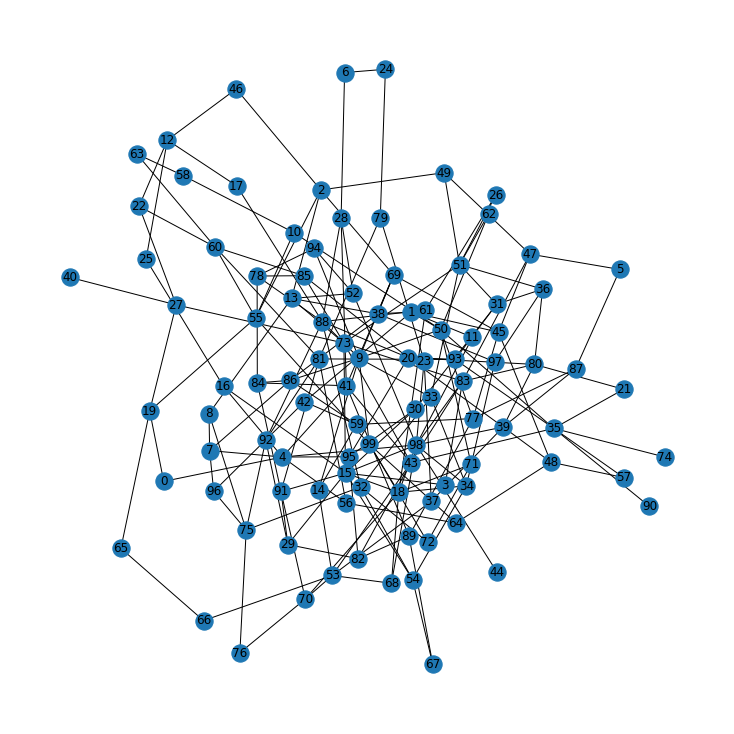

In [72]:
nx.draw(graph, with_labels=True)


In [34]:
l = nx.to_dict_of_lists(graph)
l

{0: [19, 4],
 1: [38, 50, 45, 42, 11],
 2: [13, 69, 55, 46, 49],
 3: [83, 15],
 4: [41, 98, 95, 7, 16, 56, 0],
 5: [47, 87],
 6: [28, 24],
 7: [96, 8, 4, 86],
 8: [75, 7, 13],
 9: [94, 50, 33, 99, 86, 88, 69, 14],
 10: [58, 55, 50],
 11: [1, 98],
 12: [17, 22, 25, 46],
 13: [52, 2, 8, 38, 73],
 14: [53, 59, 9],
 15: [3, 18, 16, 73, 29, 91, 98, 30, 54, 95],
 16: [15, 4, 25],
 17: [12, 88],
 18: [61, 34, 98, 15, 68, 70, 99, 71],
 19: [55, 27, 0, 65],
 20: [95, 85, 88, 93, 80, 39],
 21: [80, 35],
 22: [12, 60, 27],
 23: [37, 79, 98],
 24: [6, 79],
 25: [12, 16],
 26: [51, 61],
 27: [73, 19, 40, 22],
 28: [6, 88, 52, 41],
 29: [82, 92, 15, 91],
 30: [31, 95, 15],
 31: [36, 30, 93, 51],
 32: [88, 33, 75, 54, 72],
 33: [32, 34, 9, 51],
 34: [97, 98, 18, 33, 54],
 35: [93, 50, 90, 57, 21, 74, 43],
 36: [31, 80, 51, 97],
 37: [23, 39, 53],
 38: [69, 86, 97, 1, 13],
 39: [80, 87, 20, 48, 37, 98],
 40: [27],
 41: [84, 4, 69, 89, 28, 43],
 42: [59, 96, 1],
 43: [82, 83, 53, 73, 35, 41],
 44: [98]

In [43]:
def find_connected_components(graph):
   visited = []
   connected_components = []
   for node in graph.nodes:
       if node not in visited:
           cc = [] #connected component
           visited, cc = dfs_traversal(graph, node, visited, cc)
           connected_components.append(cc)
   return connected_components

def dfs_traversal(graph, start, visited, path):
   if start in visited:
       return visited, path
   visited.append(start)
   path.append(start)
   for node in graph.neighbors(start):
       visited, path = dfs_traversal(graph, node, visited, path)
   return visited, path

In [44]:
connected_components = find_connected_components(graph)

print("Total number of connected components =", len(connected_components))

for cc in connected_components:

    print(cc)

Total number of connected components = 1
[0, 19, 55, 60, 81, 93, 35, 50, 77, 87, 39, 80, 36, 31, 30, 95, 20, 85, 78, 94, 9, 33, 32, 88, 92, 29, 82, 43, 83, 3, 15, 18, 61, 26, 51, 73, 27, 40, 22, 12, 17, 25, 16, 4, 41, 84, 86, 59, 42, 96, 7, 8, 75, 76, 70, 53, 68, 98, 34, 97, 38, 69, 45, 48, 64, 99, 72, 71, 56, 57, 47, 49, 2, 13, 52, 28, 6, 24, 79, 23, 37, 46, 5, 1, 11, 54, 67, 89, 44, 14, 66, 65, 91, 62, 21, 10, 58, 63, 90, 74]


In [51]:
def search(graph, start, goal):
    visited = {start: None}
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = visited[node]
            return path[::-1]
        for neighbour in graph[node]:
            if neighbour not in visited:
                visited[neighbour] = node
                queue.append(neighbour)

In [62]:
start = randint(0, 99)
end = randint(0, 99)

print("start node is {}, end node is {}".format(start, end))

print("shortest path is ", search(l, start, end))

start node is 67, end node is 20
shortest path is  [67, 89, 82, 95, 20]


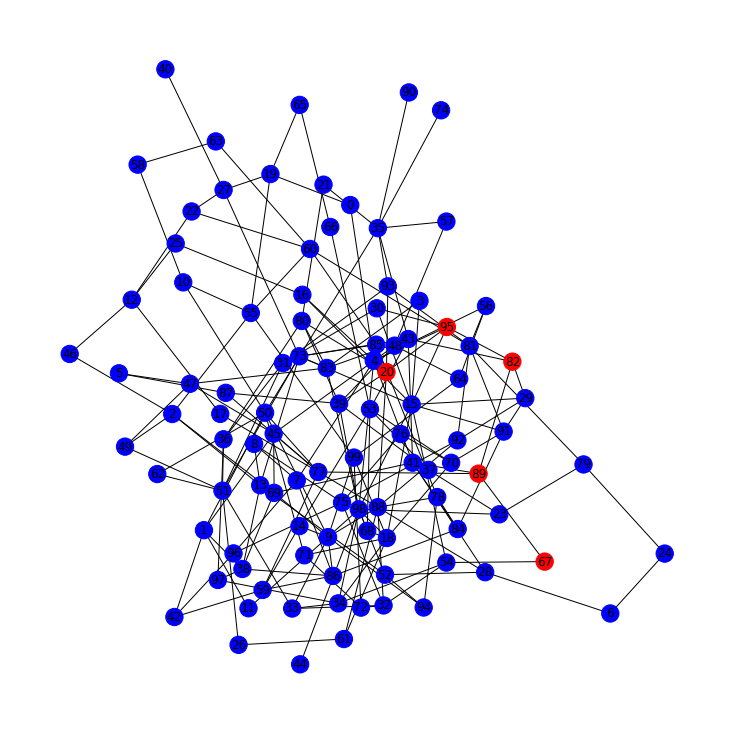

In [75]:
color_map = []
for node in graph:
    if node in [67, 89, 82, 95, 20]:
        color_map.append('red')
    else: 
        color_map.append('blue') 

nx.draw(graph, node_color=color_map, with_labels=True)
